In [175]:
import os
import glob
import re

from collections import namedtuple

import time
from datetime import datetime, timedelta

import matplotlib.pyplot as plt

import numpy as np

import itertools

In [131]:
log_file_list = glob.glob('../chats/*.log')

In [132]:
log_file = log_file_list[0]

In [133]:
Chat = namedtuple('Chat', 'time id text')

In [144]:
t0 = datetime.strptime('00:00:00','%H:%M:%S')

In [161]:
chat_history = list()

with open(log_file, 'r') as file:
    
    count = 0
    for chat in file:
#     chat = next(file).strip()
#         print(chat.strip())
        chat_time = re.search('\[.*?\]', chat)[0]
        user_id_match = re.search('<.*?>', chat)
        user_id = user_id_match[0]
        start_of_chat = user_id_match.span()[-1]
        text = chat[start_of_chat:].strip()
        
        dt = datetime.strptime(chat_time,'[%H:%M:%S]') - t0
#         print(dt.total_seconds())
        
        chat_tuple = Chat(dt.total_seconds(), user_id[1:-1], text)

#         print('{}'.format(chat_tuple))
        chat_history.append(chat_tuple)
        

In [163]:
chat_time_list = [getattr(chat, 'time') for chat in chat_history]

In [190]:
max_min = np.int(np.ceil(max(chat_time_list)/60) + 1)

In [245]:
def express_bins_as_time_range(bins, index_list):
    
    time_range_list = list()
    
    for index in index_list:
        begin = timedelta(seconds=int(bins[index]))
        end = timedelta(seconds=int(bins[index+1]))
        print('[{} ~ {}]'.format(begin, end))
        time_range_list.append((begin, end))
        
    return time_range_list
    

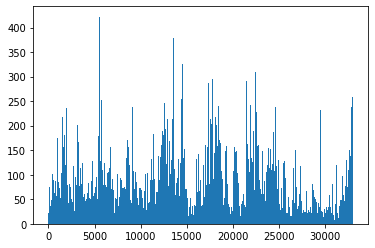

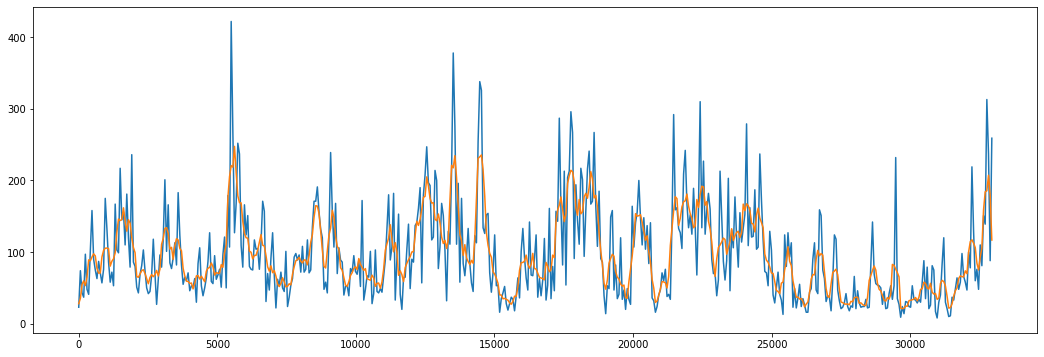

0.26304347826086355
40.876208622093976
[92, 226, 359, 375, 493, 548, 551]
[1:31:42 ~ 1:32:41]
[3:45:12 ~ 3:46:12]
[5:57:43 ~ 5:58:43]
[6:13:40 ~ 6:14:40]
[8:11:14 ~ 8:12:14]
[9:06:02 ~ 9:07:02]
[9:09:02 ~ 9:10:02]


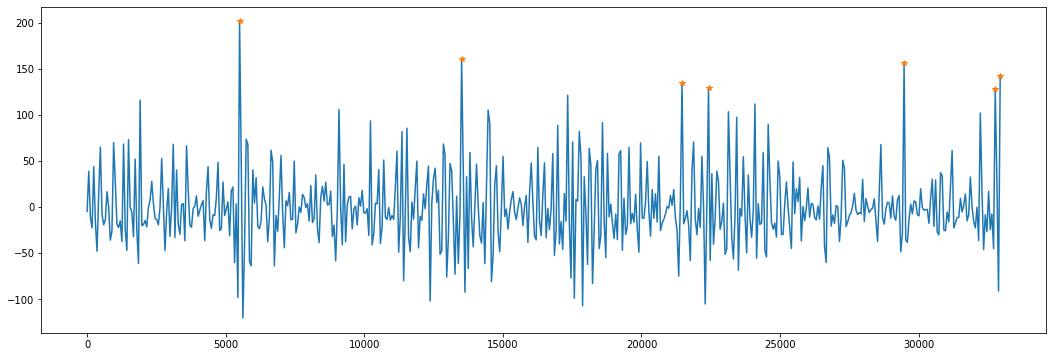

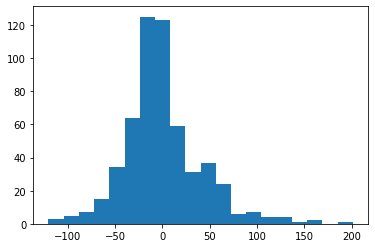

In [253]:
plt.figure()
histogram, bins, _ = plt.hist(chat_time_list, bins=max_min)
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram)
historgram_avg = np.convolve(histogram, np.ones(5)/5, 'same')
plt.plot(bins[:-1], historgram_avg)
plt.show()

histogram_delta = histogram - historgram_avg

print(np.mean(histogram_delta))

print(np.std(histogram_delta))

outlier_idx = np.argwhere(histogram_delta > np.mean(histogram_delta) + 3 * np.std(histogram_delta))
outlier_idx = list(itertools.chain.from_iterable(outlier_idx))

print(outlier_idx)
express_bins_as_time_range(bins, outlier_idx)

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram_delta)
plt.plot(bins[:-1][outlier_idx], histogram_delta[outlier_idx], '*')
plt.show()



plt.figure()
_, _, _ = plt.hist(histogram_delta, bins=20)
plt.show()

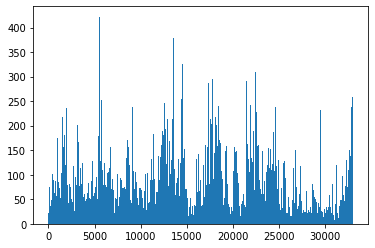

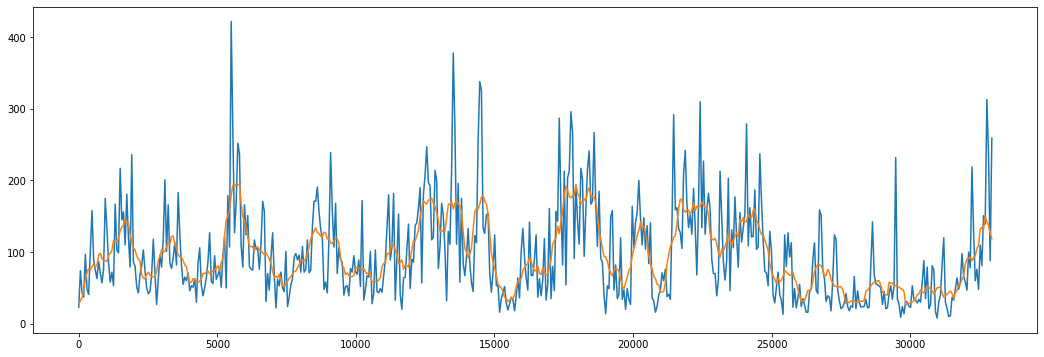

0.6449275362318795
47.04841142640601
[92, 226, 242, 243, 290, 359, 375, 493, 548]
[1:31:42 ~ 1:32:41]
[3:45:12 ~ 3:46:12]
[4:01:09 ~ 4:02:09]
[4:02:09 ~ 4:03:08]
[4:48:58 ~ 4:49:58]
[5:57:43 ~ 5:58:43]
[6:13:40 ~ 6:14:40]
[8:11:14 ~ 8:12:14]
[9:06:02 ~ 9:07:02]


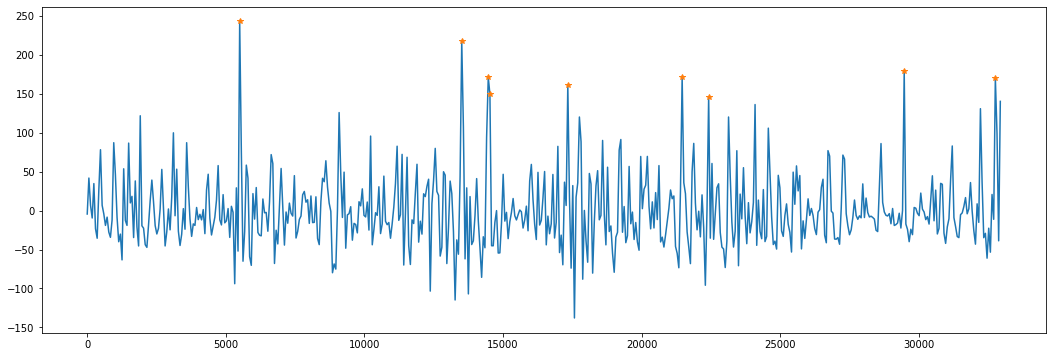

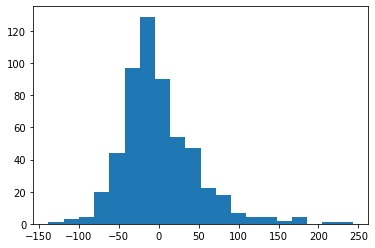

In [255]:
plt.figure()
histogram, bins, _ = plt.hist(chat_time_list, bins=max_min)
plt.show()

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram)
historgram_avg = np.convolve(histogram, np.ones(10)/10, 'same')
plt.plot(bins[:-1], historgram_avg)
plt.show()

histogram_delta = histogram - historgram_avg

print(np.mean(histogram_delta))

print(np.std(histogram_delta))

outlier_idx = np.argwhere(histogram_delta > np.mean(histogram_delta) + 3 * np.std(histogram_delta))
outlier_idx = list(itertools.chain.from_iterable(outlier_idx))

print(outlier_idx)
express_bins_as_time_range(bins, outlier_idx)

plt.figure(figsize=(18, 6))
plt.plot(bins[:-1], histogram_delta)
plt.plot(bins[:-1][outlier_idx], histogram_delta[outlier_idx], '*')
plt.show()



plt.figure()
_, _, _ = plt.hist(histogram_delta, bins=20)
plt.show()

In [262]:
print(datetime.now().strftime("%H-%M-%S"))

17-34-49
